# Word2Vec with Gensim

In [1]:
import numpy as np
import pandas as pd
import gensim
import wikipedia as wiki
import nltk
import string

C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
wiki_coffee=wiki.summary("coffee")

In [3]:
## Converting everything into lower case 
def Convert_lower(text):
    return text.lower() 

In [4]:
wiki_coffee=Convert_lower(wiki_coffee)
wiki_coffee

'coffee is a brewed drink prepared from roasted coffee beans, the seeds of berries from certain coffea species. the genus coffea is native to tropical africa (specifically having its origin in ethiopia and sudan) and madagascar, the comoros, mauritius, and réunion in the indian ocean. coffee plants are now cultivated in over 70 countries, primarily in the equatorial regions of the americas, southeast asia, indian subcontinent, and africa. the two most commonly grown are c. arabica and c. robusta. once ripe, coffee berries are picked, processed, and dried. dried coffee seeds (referred to as "beans") are roasted to varying degrees, depending on the desired flavor. roasted beans are ground and then brewed with near-boiling water to produce the beverage known as coffee.\ncoffee is darkly colored, bitter, slightly acidic and has a stimulating effect in humans, primarily due to its caffeine content. it is one of the most popular drinks in the world, and it can be prepared and presented in a 

In [5]:
## Removing punctuations
import re
def remove_punc(text):
    p = re.compile(r'[?|!|\'|"|#|.|,|@|)|(|\|/|~|%|*|\n]')
    return p.sub('',text)

In [6]:
wiki_coffee=remove_punc(wiki_coffee)
wiki_coffee

'coffee is a brewed drink prepared from roasted coffee beans the seeds of berries from certain coffea species the genus coffea is native to tropical africa specifically having its origin in ethiopia and sudan and madagascar the comoros mauritius and réunion in the indian ocean coffee plants are now cultivated in over 70 countries primarily in the equatorial regions of the americas southeast asia indian subcontinent and africa the two most commonly grown are c arabica and c robusta once ripe coffee berries are picked processed and dried dried coffee seeds referred to as beans are roasted to varying degrees depending on the desired flavor roasted beans are ground and then brewed with near-boiling water to produce the beverage known as coffeecoffee is darkly colored bitter slightly acidic and has a stimulating effect in humans primarily due to its caffeine content it is one of the most popular drinks in the world and it can be prepared and presented in a variety of ways eg espresso french

In [7]:
## Tokenization of wiki_coffee
wiki_coffee=nltk.word_tokenize(wiki_coffee)

In [8]:
## Now Tokenizing every word.
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
## Craeting a list
def AfterStopwords(dataframe):
    corpus_ws=[]
    for word in dataframe:
        if word not in stopWords:
            corpus_ws.append(word)
    return  corpus_ws


In [9]:
### New
NewCorpus_coffee=AfterStopwords(dataframe=wiki_coffee)
print('Length of the Tokenization after eliminating stop words->',NewCorpus_coffee)

Length of the Tokenization after eliminating stop words-> ['coffee', 'brewed', 'drink', 'prepared', 'roasted', 'coffee', 'beans', 'seeds', 'berries', 'certain', 'coffea', 'species', 'genus', 'coffea', 'native', 'tropical', 'africa', 'specifically', 'origin', 'ethiopia', 'sudan', 'madagascar', 'comoros', 'mauritius', 'réunion', 'indian', 'ocean', 'coffee', 'plants', 'cultivated', '70', 'countries', 'primarily', 'equatorial', 'regions', 'americas', 'southeast', 'asia', 'indian', 'subcontinent', 'africa', 'two', 'commonly', 'grown', 'c', 'arabica', 'c', 'robusta', 'ripe', 'coffee', 'berries', 'picked', 'processed', 'dried', 'dried', 'coffee', 'seeds', 'referred', 'beans', 'roasted', 'varying', 'degrees', 'depending', 'desired', 'flavor', 'roasted', 'beans', 'ground', 'brewed', 'near-boiling', 'water', 'produce', 'beverage', 'known', 'coffeecoffee', 'darkly', 'colored', 'bitter', 'slightly', 'acidic', 'stimulating', 'effect', 'humans', 'primarily', 'due', 'caffeine', 'content', 'one', 'pop

In [10]:
documents=[NewCorpus_coffee]

In [11]:
# build vocabulary and train model
model = gensim.models.Word2Vec (documents,min_count=1,size=32)
model.train(documents,total_examples=len(documents),epochs=1000)

(151122, 250000)

In [12]:
w1 = ["expanding"]
model.wv.most_similar (positive=w1)

C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('organic', 0.9885283708572388),
 ('fair', 0.97634357213974),
 ('markets', 0.9579740762710571),
 ('consequently', 0.935758113861084),
 ('use', 0.9100143313407898),
 ('coffee-growing', 0.8748865127563477),
 ('land', 0.8418675661087036),
 ('trade', 0.8367928266525269),
 ('clearing', 0.8191864490509033),
 ('regards', 0.7845898866653442)]

In [13]:
# look up top 6 words similar to 'sudan'
w1 = ["sudan"]
model.wv.most_similar (positive=w1,topn=8)

C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ethiopia', 0.9946420788764954),
 ('madagascar', 0.9849677681922913),
 ('origin', 0.9724627137184143),
 ('comoros', 0.9623600840568542),
 ('specifically', 0.951302707195282),
 ('mauritius', 0.9229506850242615),
 ('tropical', 0.8878210783004761),
 ('réunion', 0.8541017174720764)]

In [14]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
vocab = list(model.wv.most_similar (positive=w1,topn=6))
vocab=['ethiopia','madagascar','origin','comoros','specifically','mauritius','agricultural','tropical','réunion']
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df.iloc[0:,]


C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


,x,y
ethiopia,115.222610,35.738609
madagascar,128.953445,-101.670120
origin,22.934774,-48.436676
comoros,10.590251,-172.744431
specifically,-104.351173,-126.588867
mauritius,9.440293,100.201218
agricultural,-70.297508,-1.754560
tropical,-187.498138,-25.362089
réunion,-121.381935,106.352631


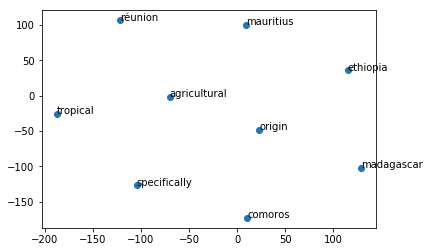

In [15]:
### Scatterplot of words which are near to sudan
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

###### Similarity between two words

In [16]:
model.wv.similarity(w1="world",w2="countries")

C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.49519828

In [17]:
## Between two similar words
model.wv.similarity(w1="world",w2="world")

C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.99999994